         date        state   district  female  male  deaths
0  2018-01-01  Maharashtra  Nandurbar     301   500     801
1  2018-01-01  Maharashtra      Dhule     330   549     879
2  2018-01-01  Maharashtra    Jalgaon     370   588     958
3  2018-01-01  Maharashtra    Buldana     223   310     533
4  2018-01-01  Maharashtra      Akola     378   537     915
            date        state    district  female  male  deaths
1471  2021-05-01  Maharashtra   Ratnagiri     219   296     515
1472  2021-05-01  Maharashtra  Sindhudurg     467   783    1250
1473  2021-05-01  Maharashtra    Kolhapur     690  1008    1698
1474  2021-05-01  Maharashtra      Sangli     288   480     768
1475  2021-05-01  Maharashtra     Palghar     669  1032    1701


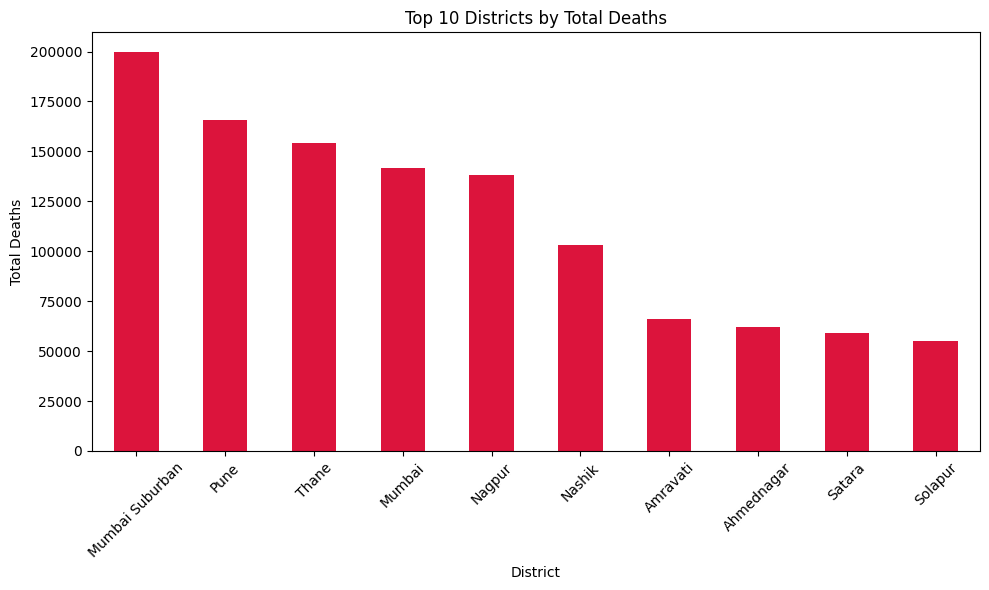

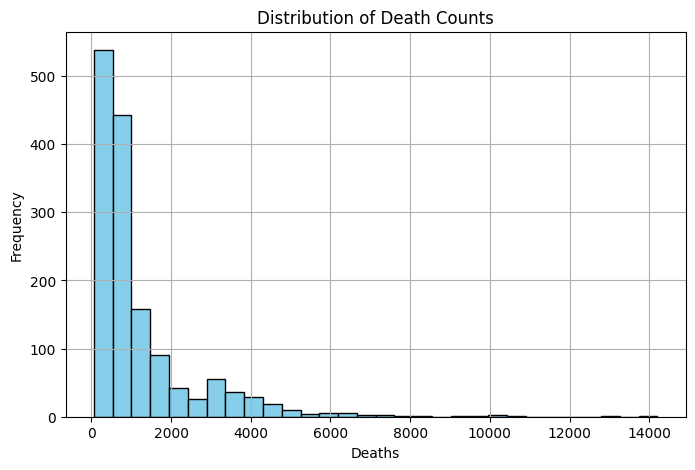

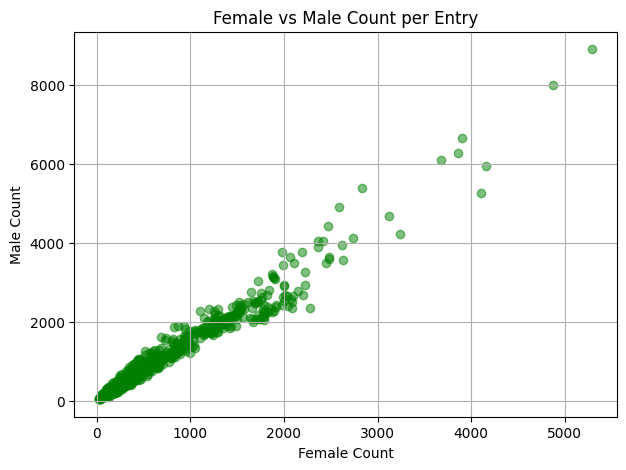

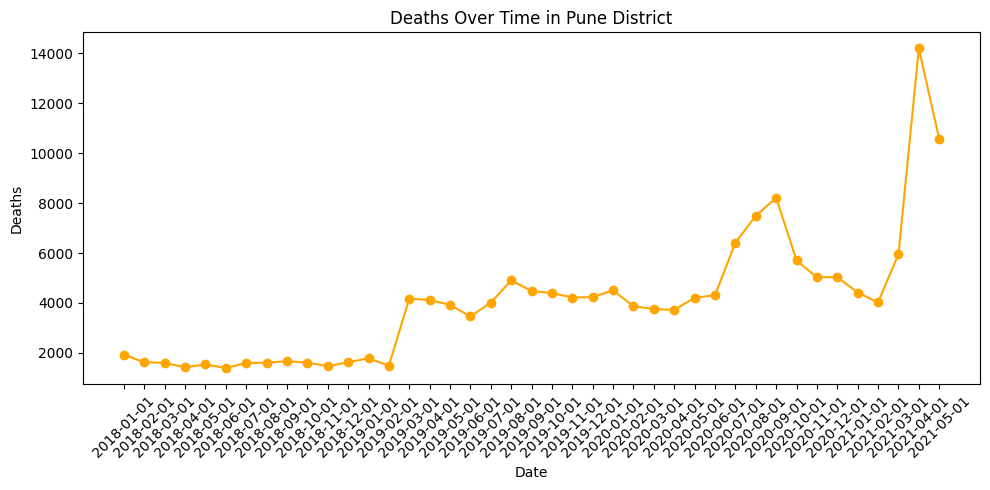

date        0
state       0
district    0
female      0
male        0
deaths      0
dtype: int64
         date  state  district    female      male    deaths
0  2018-01-01      0        20  0.052552  0.052596  0.052312
1  2018-01-01      0         8  0.058054  0.058115  0.057826
2  2018-01-01      0        12  0.065642  0.062507  0.063410
3  2018-01-01      0         6  0.037754  0.031197  0.033366
4  2018-01-01      0         1  0.067160  0.056763  0.060370


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import files
# uploaded = files.upload()
data = pd.read_csv("Maharashtra-districts.csv")
print(data.head())
print(data.tail())
# Bar chart of total deaths by district
top_deaths = data.groupby('district')['deaths'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_deaths.plot(kind='bar', color='crimson')
plt.title('Top 10 Districts by Total Deaths')
plt.xlabel('District')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram of death counts
plt.figure(figsize=(8,5))
plt.hist(data['deaths'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Death Counts')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of female vs male
plt.figure(figsize=(7,5))
plt.scatter(data['female'], data['male'], alpha=0.5, color='green')
plt.title('Female vs Male Count per Entry')
plt.xlabel('Female Count')
plt.ylabel('Male Count')
plt.grid(True)
plt.show()

# Line plot of deaths over time for Pune
pune_data = data[data['district'] == 'Pune']
plt.figure(figsize=(10,5))
plt.plot(pune_data['date'], pune_data['deaths'], marker='o', color='orange')
plt.title('Deaths Over Time in Pune District')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for missing values
print(data.isnull().sum())


# Encode 'state' and 'district' columns into numbers
data['state'] = data['state'].astype('category').cat.codes
data['district'] = data['district'].astype('category').cat.codes


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['female', 'male', 'deaths']] = scaler.fit_transform(data[['female', 'male', 'deaths']])


print(data.head())